# Memb2D

Memb2D is a class toolbox developed with the puspose of facilitate the analysis of lipids membranes, particularly helping with two main problems:

- Some analyses are written for specific file extension, such as GROMACS, which complicates its wide usage. 
  
- Other analyses deal with properties only in one dimension (such as SCD). However, the lipid membrane is a highly complex environment and can have local changes afecting its properties and interactions with other biopolymers such as proteins or RNA. For instance, is well known that for phase transitions local properties, as well as for lipid raft fromations.

Here, we solve the first problem by using as base MDAnalysis, which is a widely used python library to study molecular dynamics systems. MDAnalysis allows to import files from different engines and proccess its information using widely know libraries such as numpy or pandas. This approach facilitates building pipelines for systems or automatize the analysis for various replicates. Here we focus primarily in membrane simulations that uses Charmm forcefield, however some analysis can be adapted easily to other forcefields. We plan to include support for different force fields in the future. On the other hand, we used a two-dimensional approach, where the xy plane is divided into a 2D grid and the different properties are projectected into it. This grid approach allows for easy visual inspections and comparison with different parts of the membrane. Some of the properties we included in this work are:

- Lipid distribution
- Membrane charge
- Membrane thickness
- Order parameters
- Area per lipid with a voronoi approach
- Packing defects

 Note that, in all cases but packing defects, several frames are considered in order to take averages over time. Likewise, each grid square contains the local time average of the property under study.  

#### Import our class

And some libraries we may need

In [3]:
from twodanalysis import Memb2D
import MDAnalysis as mda
import numpy as np 
import matplotlib.pyplot as plt

The class `Memb2D` set up our membrane for analysis, it do some guesses such as lipid chain lenght, the values max and min in the xy axis. Among others.

## Membrane thickness

Membrane thickness is the distance the two leaflets of the lipid bilayer, computed from the lipid headgroup on one layer to the opossite. This property is influenced by several factors such as lipid compositions, cholesterol content, an temperature. This property is intimately related to membrane permeability, with a high thickness indicates low permeability. Furthermore, abnormalities in membrane thickness have been reported to be lated with diseases such as cancer and Alzheimer.

Here we present how to compute 2D membrane thickness using our code.

Computing matrix for top in frames 61-110
Computing matrix for bot in frames 61-110


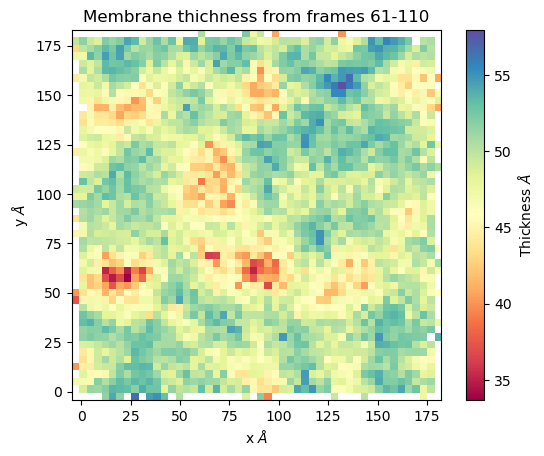

In [4]:
from twodanalysis import Memb2D
import numpy as np 
import matplotlib.pyplot as plt

# Import for MLKL membrane
top = "../../../../centered_prot.gro"
traj = "../../../../centered_prot.xtc"
tpr = "../../../../veamos.tpr"


# Data for RNA membrane
traj = "membrane.xtc"
tpr = "../data/veamos.tpr"



universe = mda.Universe(tpr,traj)
# Define a membrane object using a universe
membrane = Memb2D(universe,
                    verbose = False,
                    add_radii = True)


# Compute the thickness of the membrane from frame 61 to frame 110, with 50 gridsquares. 
# Notice that as no edges are provided, the code uses the min and max values of the first frame. 
mat_thi, edges = membrane.thickness(50,start = 61, final = 110, step = 1)



# Plor using imshow
plt.imshow(mat_thi, extent=edges, cmap="Spectral")
plt.xlabel("x $\AA$")
plt.ylabel("y $\AA$")
plt.title("Membrane thichness from frames 61-110")
cbar = plt.colorbar()
cbar.set_label('Thickness $\AA$')


Let's walkthruogt the code:

The method `thickness(nbins, lipids, edges, start, final, step)` is applied to a membrane and their main parameters are:

- `nbins` : Set up the number of bins
- `lipids` : Account for the lipids in the membrane
- `edges` : edges for the grid we will be working
- `start` : Start frame
- `final` : Final frame
- `step` : Frames to skip

This method can be applied to the `Mem2D` object and the minimun it needs is nbins.

This code loops over frames, from `start` to `final` skiping `step` frames, and stores the xy positions of lipid heads. The positions are then used to compute the mean thickness of each grid square. This tool is useful to identify changes in mmbrane thickness over time, i.e., a protein changes it. Follows a comparison between different time periods, where we can see that they follows similar patters.


Computing matrix for top in frames 61-110
Computing matrix for bot in frames 61-110
Computing matrix for top in frames 111-160
Computing matrix for bot in frames 111-160
<class 'numpy.ndarray'> True


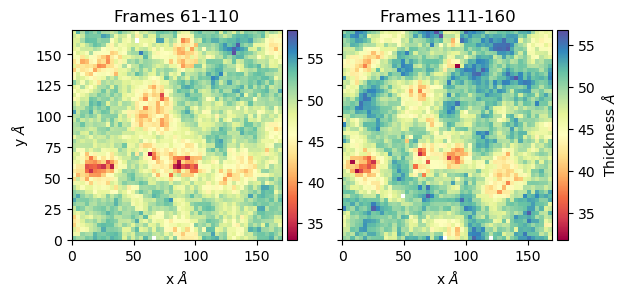

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Compute thickness for two frame/time intervals
mat_thi, edges = membrane.thickness(50, edges = [0,170,0,170],start = 61, final = 110, step = 1)
mat_thi_sec, edges = membrane.thickness(50, edges = [0,170,0,170],start = 111, final = 160, step = 1)





# Plot the resulting thickness
fig, ax = plt.subplots(1,2, sharex = True, sharey = True)
first = ax[0].imshow(mat_thi, extent=edges, cmap="Spectral")
ax[0].set_xlabel("x $\AA$")
ax[0].set_ylabel("y $\AA$")
ax[0].set_title("Frames 61-110")
divider1 = make_axes_locatable(ax[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(first, cax = cax1)


second = ax[1].imshow(mat_thi_sec, extent=edges, cmap="Spectral")
ax[1].set_xlabel("x $\AA$")
ax[1].set_title("Frames 111-160")
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(second, cax = cax2)
cbar.set_label('Thickness $\AA$')
print(type(mat_thi), isinstance(mat_thi, np.ndarray))


Follows a comparison between different time periods, where we can see that they do not follow similar patters anymore.

Computing matrix for top in frames 61-110
Computing matrix for bot in frames 61-110
Computing matrix for top in frames 461-510
Computing matrix for bot in frames 461-510


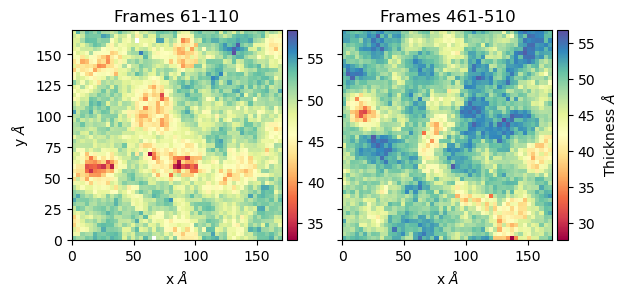

In [8]:


mat_thi, edges = membrane.thickness(50, edges = [0,170,0,170],start = 61, final = 110, step = 1)
mat_thi_sec, edges = membrane.thickness(50, edges = [0,170,0,170],start = 461, final = 510, step = 1)

fig, ax = plt.subplots(1,2, sharex = True, sharey = True)
first = ax[0].imshow(mat_thi, extent=edges, cmap="Spectral")
ax[0].set_xlabel("x $\AA$")
ax[0].set_ylabel("y $\AA$")
ax[0].set_title("Frames 61-110")
divider1 = make_axes_locatable(ax[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(first, cax = cax1)


second = ax[1].imshow(mat_thi_sec, extent=edges, cmap="Spectral")
ax[1].set_xlabel("x $\AA$")
ax[1].set_title("Frames 461-510")
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(second, cax = cax2)
cbar.set_label('Thickness $\AA$')

Notice that this code does not account for CHL, if you want to consider it you should pass the lispid list specifically as follows.

Lipids taken into account ['CHL1', 'DODMA', 'DSPC', 'POPE']
Computing matrix for top in frames 61-110
Computing matrix for bot in frames 61-110
Computing matrix for top in frames 461-510
Computing matrix for bot in frames 461-510


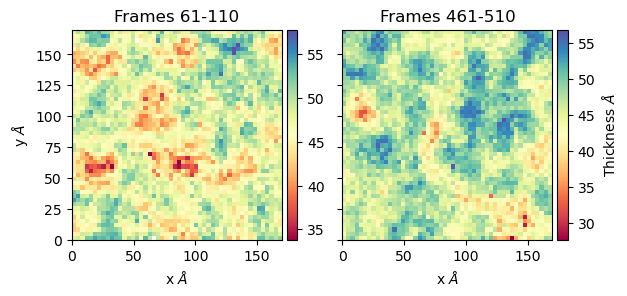

In [9]:

lipid_list = list(membrane.lipid_list)
print(f"Lipids taken into account {lipid_list}")

# compute thickness with specific lipids
mat_thi, edges = membrane.thickness(50, lipids = lipid_list, edges = [0,170,0,170],start = 61, final = 110, step = 1)
mat_thi_sec, edges = membrane.thickness(50,  lipids = lipid_list, edges = [0,170,0,170],start = 461, final = 510, step = 1)


# Plot results
fig, ax = plt.subplots(1,2, sharex = True, sharey = True)
first = ax[0].imshow(mat_thi, extent=edges, cmap="Spectral")
ax[0].set_xlabel("x $\AA$")
ax[0].set_ylabel("y $\AA$")
ax[0].set_title("Frames 61-110")
divider1 = make_axes_locatable(ax[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(first, cax = cax1)


second = ax[1].imshow(mat_thi_sec, extent=edges, cmap="Spectral")
ax[1].set_xlabel("x $\AA$")
ax[1].set_title("Frames 461-510")
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(second, cax = cax2)
cbar.set_label('Thickness $\AA$')

To compute the thickness we consided the P carbon of the phospholipids and the O3' atom of the CHL1, if you need to change this behaviour you should update the dictionary `membrane.working_lip[lipid][head]`. For example


In [63]:

membrane.working_lip["CHL1"]["head"] = "C9"

This will change the plots as follows

Computing matrix for top in frames 61-110
Computing matrix for bot in frames 61-110
Computing matrix for top in frames 461-510
Computing matrix for bot in frames 461-510


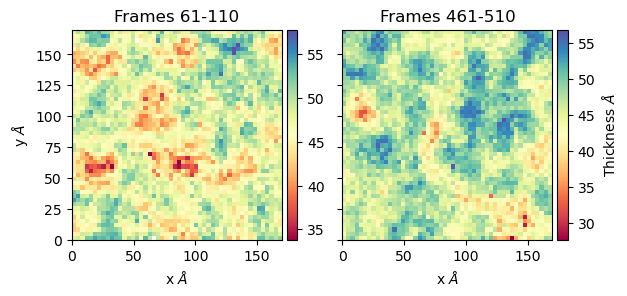

In [10]:

lipid_list = list(membrane.lipid_list)

# Compute thickness acounting C9 atom fro CHL1
mat_thi, edges = membrane.thickness(50, lipids = lipid_list, edges = [0,170,0,170],start = 61, final = 110, step = 1)
mat_thi_sec, edges = membrane.thickness(50,  lipids = lipid_list, edges = [0,170,0,170],start = 461, final = 510, step = 1)




# Plot results
fig, ax = plt.subplots(1,2, sharex = True, sharey = True)
first = ax[0].imshow(mat_thi, extent=edges, cmap="Spectral")
ax[0].set_xlabel("x $\AA$")
ax[0].set_ylabel("y $\AA$")
ax[0].set_title("Frames 61-110")
divider1 = make_axes_locatable(ax[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(first, cax = cax1)


second = ax[1].imshow(mat_thi_sec, extent=edges, cmap="Spectral")
ax[1].set_xlabel("x $\AA$")
ax[1].set_title("Frames 461-510")
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(second, cax = cax2)
cbar.set_label('Thickness $\AA$')

We can also compute the thickness using the center of mass of several atoms in the lipid head. As before, you should specify what atoms will be considered. For example:

{'CHL1', 'DODMA', 'DSPC', 'POPE'}
Computing matrix for top in frames 61-110
Computing matrix for bot in frames 61-110
Computing matrix for top in frames 461-510
Computing matrix for bot in frames 461-510


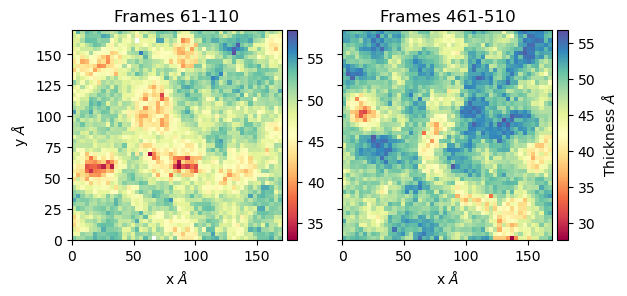

In [ ]:
# Return CHL1 to its original atom
membrane.working_lip["CHL1"]["head"] = "O3"
print(membrane.lipid_list)

# Use other atoms for POPE
membrane.working_lip["POPE"]["head"] = ["P", "O13", "O14", "O11", "O12"]


# Compute thickness ingnoring CHL1 and using ["P", "O13", "O14", "O11", "O12"] COM for POPE
mat_thi, edges = membrane.thickness(50, edges = [0,170,0,170],start = 61, final = 110, step = 1)
mat_thi_sec, edges = membrane.thickness(50,  edges = [0,170,0,170],start = 461, final = 510, step = 1)



# Plot results
fig, ax = plt.subplots(1,2, sharex = True, sharey = True)
first = ax[0].imshow(mat_thi, extent=edges, cmap="Spectral")
ax[0].set_xlabel("x $\AA$")
ax[0].set_ylabel("y $\AA$")
ax[0].set_title("Frames 61-110")
divider1 = make_axes_locatable(ax[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(first, cax = cax1)


second = ax[1].imshow(mat_thi_sec, extent=edges, cmap="Spectral")
ax[1].set_xlabel("x $\AA$")
ax[1].set_title("Frames 461-510")
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(second, cax = cax2)
cbar.set_label('Thickness $\AA$')

`thickness` call a function called `height`, this function computes the distance from the middle of the membrane (height) projected in a 2D grid. Thus, calling `height` for each layer and adding the results ends with membrane thickness. The user can compute the height matrix as follows.

 lipids to be used in this code  ['DODMA', 'DSPC', 'POPE']
Computing matrix for top in frames 61-110
Computing matrix for bot in frames 61-110


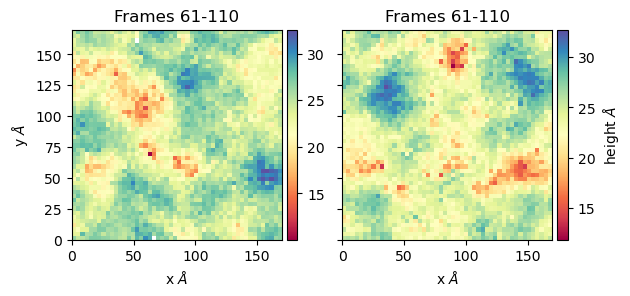

In [ ]:

lipids = list(membrane.lipid_list)
lipids.remove("CHL1")
print(f" lipids to be used in this code  {lipids}")

# Return to the use of P for POPE
membrane.working_lip["POPE"]["head"] = "P"

# Compute the height of the monolayers top/bot form the mid of the membrane
mat_top, edges = membrane.height_matrix(lipids=lipids, layer = "top", nbins = 50, edges = [0,170,0,170],start = 61, final = 110, step = 1)
mat_bot, edges = membrane.height_matrix(lipids=lipids, layer = "bot", nbins = 50, edges = [0,170,0,170],start = 61, final = 110, step = 1)

fig, ax = plt.subplots(1,2, sharex = True, sharey = True)
first = ax[0].imshow(mat_top, extent=edges, cmap="Spectral")
ax[0].set_xlabel("x $\AA$")
ax[0].set_ylabel("y $\AA$")
ax[0].set_title("Frames 61-110")
divider1 = make_axes_locatable(ax[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(first, cax = cax1)


second = ax[1].imshow(mat_bot, extent=edges, cmap="Spectral")
ax[1].set_xlabel("x $\AA$")
ax[1].set_title("Frames 61-110")
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(second, cax = cax2)
cbar.set_label('height $\AA$')


Computing matrix for top in frames 61-110
Computing matrix for bot in frames 61-110


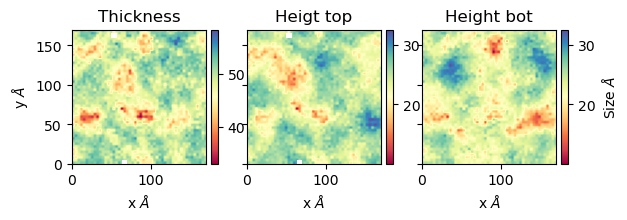

In [18]:
# Plot for both heights and the thickness

mat_thi, edges = membrane.thickness(50, edges = [0,170,0,170],start = 61, final = 110, step = 1)

fig, ax = plt.subplots(1,3, sharex = True, sharey = True)
first = ax[0].imshow(mat_thi, extent=edges, cmap="Spectral")
ax[0].set_xlabel("x $\AA$")
ax[0].set_ylabel("y $\AA$")
ax[0].set_title("Thickness")
divider1 = make_axes_locatable(ax[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(first, cax = cax1)


second = ax[1].imshow(mat_top, extent=edges, cmap="Spectral")
ax[1].set_xlabel("x $\AA$")
ax[1].set_title("Heigt top")
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(second, cax = cax2)


third = ax[2].imshow(mat_bot, extent=edges, cmap="Spectral")
ax[2].set_xlabel("x $\AA$")
ax[2].set_title("Height bot")
divider2 = make_axes_locatable(ax[2])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(second, cax = cax2)

cbar.set_label('Size $\AA$')




# Order parameters (SCD)

When studying a membrane one of the most important properties is the order parameters SCD. This property measure the order of the lipids within the membrane and provide crucial insights intro the structural and dynamic properties of the bilayer. SCD can be determined experimentally and computationally turning them into the comparison point between both kind of studies. For all-atom molecular dynamics simulations, SCD for the $i-th$ carbon is computed with the following equation

$$ SCD_i = \left| \braket{\frac{3cos^2(\theta_i)}{2} - \frac{1}{2}}\right|, $$

where $\theta_i$ is the angle between the $i-th$ carbon and its hydrogens. Notice that this quantity is averaged over lipids and over time, as well as its absolute value is taken into account.

## 2D order parameters

Given that order parameters provide valuable structural and dynamical information and that the membrane is a highly complex system where the properties can change from point to point, we provide a way to compute SCD in a 2D fashion, averaged in time for each grid square. Here, the positions of the lipids is tracked for several frames and mapped to a 2D grid build by user specifications. Then, for each grid square, for each lipid specie, for each tail, the SCD is computed. Likewise, we compute the SCD average of the lipid tails and finally average over lipid species. The final result is a 2D grid matrix containing averaged SCD over a short period of time. 

The method described above is part of Memb2D as can be used as follows:

DODMA
DSPC
POPE


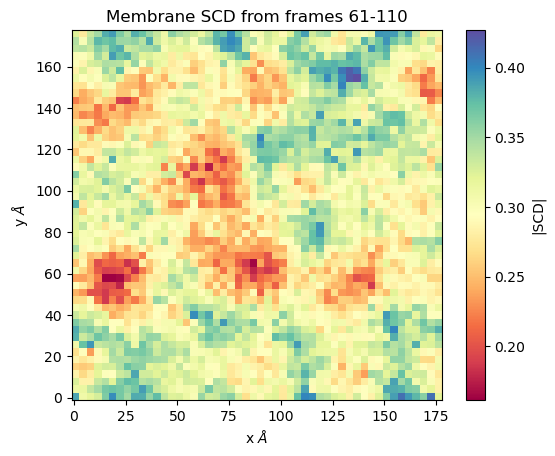

In [ ]:

# Compute average order parameters for each grid squate over 61 to 110 frames 
scd, edges = membrane.all_lip_order("both", 50, start = 61, final=110, step = 1)


plt.imshow(scd, extent=edges, cmap="Spectral")
plt.xlabel("x $\AA$")
plt.ylabel("y $\AA$")
plt.title("Membrane SCD from frames 61-110")
cbar = plt.colorbar()
cbar.set_label('|SCD|')


User can also compute the order parameters for only one layer as follows:

POPE
DSPC
DODMA
POPE
DSPC
DODMA


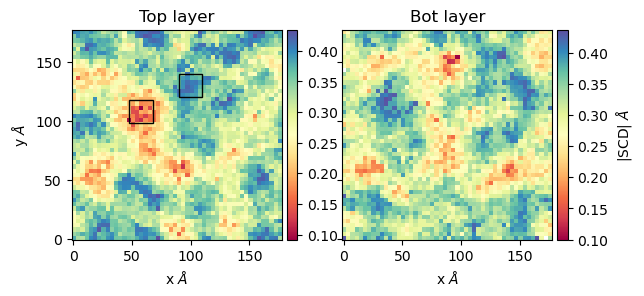

In [19]:
import matplotlib.patches as patches

# Compute average order parameters layers for each grid squate over 61 to 110 frames 
scd_top, edges = membrane.all_lip_order("top", 50, start = 61, final=110, step = 1)
scd_bot, edges = membrane.all_lip_order("bot", 50, start = 61, final=110, step = 1)




# Plot 
fig, ax = plt.subplots(1,2, sharex = True, sharey = True)
first = ax[0].imshow(scd_top, extent=edges, cmap="Spectral")
ax[0].set_xlabel("x $\AA$")
ax[0].set_ylabel("y $\AA$")
ax[0].set_title("Top layer")
divider1 = make_axes_locatable(ax[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(first, cax = cax1)
# Point to a low ordered region
ax[0].add_patch(patches.Rectangle((48, 98), 20,20, linewidth = 1, edgecolor = "black", facecolor = "none"))
ax[0].add_patch(patches.Rectangle((90, 120), 20,20, linewidth = 1, edgecolor = "black", facecolor = "none"))



second = ax[1].imshow(scd_bot, extent=edges, cmap="Spectral")
ax[1].set_xlabel("x $\AA$")
ax[1].set_title("Bot layer")
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(second, cax = cax2)
cbar.set_label('|SCD| $\AA$')


We underlined two regions on the top layer plot. These regions correspond to a low ordered region and a high ordered region that are easily computed with our toolkit. Follows a VMD plot for the lipids in the underlined regions in licorice representation and no hydrogens, where the lipids clearly show different order as our code suggest. Interestingly, the disordered regions implies a disorder in all lipids and not those known to be more disordered such as DODMA, same is true viceversa.
 
![SCD comparison](image1aa.png)

Our code also allows for computing the SCD grid for individual lipids and this is done as follows:

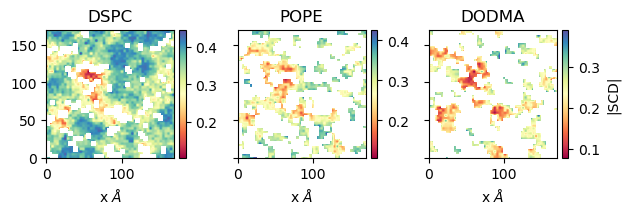

In [24]:
# Get the chains for each lipid
n_chain = membrane.chain_info

lipids = ["DSPC", "POPE", "DODMA"]

# Compute average order parameters layers for each grid squate over 61 to 110 frames
scd_matrices = {}
for lipid in lipids: 
    scd_top, edges = membrane.order_histogram(lipid, "top",edges = [0,170,0,170], n_grid= 50, n_chain = n_chain[lipid],start = 61, final=110, step = 1)
    scd_matrices[lipid] = scd_top




# Plot 
fig, ax = plt.subplots(1,len(lipids), sharex = True, sharey = True)
for i, lipid in enumerate(lipids):
    plot = ax[i].imshow(scd_matrices[lipid], extent=edges, cmap="Spectral")
    ax[i].set_xlabel("x $\AA$")
    ax[i].set_title(f"{lipid}")
    divider1 = make_axes_locatable(ax[i])
    cax1 = divider1.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(plot, cax = cax1)
cbar.set_label('|SCD|')
plt.tight_layout()


This shows the distribution of lipids and its Order parameter value. 

Notice that the code guesses chain lenght, and diferentiate between chain lenghts based on the names the forcefield assign to lipid tails. For chain sn1 the the $ith$ carbon has the shape $C3i$, whereas the hydrogens can be $HiX$, $HiY$, and $HiZ$. On the other hand, for sn2 the $ith$ carbon has the shape $C2i$ and, similarly, the hydrogens can be $HiR$, $HiS$, and $HiT$. If you are using a forcefield different than CHARMM you may have to take this into account. In the future we will change the selections in order to automatically support other forcefileds.